# 数据EDA

In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.realpath(r'D:\code\Python-Project\文本数据挖掘\WBClassify')))
from WBClassify.Utils import utils
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.svm import SVC
import random
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
def set_seed(seed=42):
	random.seed(seed)
	os.environ['PYTHONHASHSEED'] = str(seed) # 为了禁止hash随机化，使得实验可复现
	np.random.seed(seed)
 
set_seed()

In [2]:
data = pd.read_csv("../Get_Data/train2.csv")
# data['title'] = data['title'].map(utils.got_chinese)        # 除去标点符号
cut_words = utils.cut_word(data['title'].to_list(),method='hanlp')  # 进行分词
data['title'] = cut_words
data

title label
0     [持续, 追踪, 丨, 俄, 再度, 炮击, 赫尔松, ，, 泽连斯基, 呼吁, 西方, 加...    国际
1     [COP15, 专访, ｜, 穿, 汉服, 的, 中国代表团, 成员, 讲述, 谈判, 背后...    国际
2       [泰国, 一, 艘, 军舰, 沉没, ，, 搜救队, 正在, 寻找, 33名, 失踪, 船员]    国际
3     [圆桌, ｜, 威斯特伐利亚, 体系, 从未, 退场, ？, 俄, 乌, 冲突, 下, 的,...    国际
4     [法国, 败, 北, 马克龙, 表态, ：, 决赛, 不是, 提前, 写, 好, 的, 剧本...    国际
...                                                 ...   ...
4995  [北京, 第四, 批次, 6宗, 住宅, 用, 地, 收金, 135亿元, ，, “, 热度...    财经
4996  [杭州, 第四, 批次, 供, 地, ：, 8宗, 宅, 地, 收金, 98.9亿元, ，,...    财经
4997  [独家, ｜, 知情人, 谈, 张, 核子, 和, 核酸, 生意, ：, 深圳, 坐拥, 带...    财经
4998  [放量, 大, 涨, 沪, 指, 收复, 60日, 均线, ，, 反弹, 持续性, 如何, ...    财经
4999  [三天, 涨, 了, 超, 30%, ！, 翰宇药业, ：, 预防, 新, 冠, 多, 肽,...    财经

[5000 rows x 2 columns]

In [3]:
# 停用词过滤
stopwords =  pd.read_csv("../Get_data/hit_stopwords.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8').stopword.values.tolist() #list
cut_words = utils.Dropwords(stopwords,cut_words)[0] 
data['title'] = cut_words
data

title label
0     [持续, 追踪, 俄, 再度, 炮击, 赫尔松, 泽连斯基, 呼吁, 西方, 加强, 乌, 防空]    国际
1         [COP15, 专访, 穿, 汉服, 中国代表团, 成员, 讲述, 谈判, 背后, 故事]    国际
2             [泰国, 艘, 军舰, 沉没, 搜救队, 正在, 寻找, 33名, 失踪, 船员]    国际
3          [圆桌, 威斯特伐利亚, 体系, 从未, 退场, 俄, 乌, 冲突, 下, 欧洲, 变]    国际
4     [法国, 败, 北, 马克龙, 表态, 决赛, 不是, 提前, 写, 好, 剧本, 希望, ...    国际
...                                                 ...   ...
4995  [北京, 第四, 批次, 6宗, 住宅, 收金, 135亿元, 热度, 达到, 较高, 水平...    财经
4996  [杭州, 第四, 批次, 供, 8宗, 宅, 收金, 98.9亿元, 3宗, 达到, 上限,...    财经
4997  [独家, 知情人, 谈, 张, 核子, 核酸, 生意, 深圳, 坐拥, 带, 停机坪, 别墅...    财经
4998  [放量, 大, 涨, 沪, 指, 收复, 60日, 均线, 反弹, 持续性, 挑战, 半年线...    财经
4999  [三天, 涨, 超, 30%, 翰宇药业, 预防, 新, 冠, 肽, 鼻, 喷, 已, 紧急...    财经

[5000 rows x 2 columns]

<AxesSubplot:ylabel='Count'>

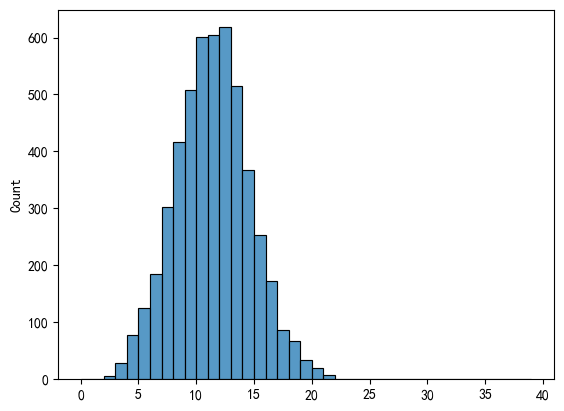

In [4]:
# 查看每行的文字的数量
import seaborn as sns
sns.histplot([len(i) for i in data['title']],bins=range(0, 40, 1))

In [5]:
data.title = data.title.apply(lambda x:" ".join(x))     # 出去中括号
data

title label
0              持续 追踪 俄 再度 炮击 赫尔松 泽连斯基 呼吁 西方 加强 乌 防空    国际
1                COP15 专访 穿 汉服 中国代表团 成员 讲述 谈判 背后 故事    国际
2                    泰国 艘 军舰 沉没 搜救队 正在 寻找 33名 失踪 船员    国际
3                  圆桌 威斯特伐利亚 体系 从未 退场 俄 乌 冲突 下 欧洲 变    国际
4            法国 败 北 马克龙 表态 决赛 不是 提前 写 好 剧本 希望 德尚 留任    国际
...                                             ...   ...
4995       北京 第四 批次 6宗 住宅 收金 135亿元 热度 达到 较高 水平 地产 界    财经
4996     杭州 第四 批次 供 8宗 宅 收金 98.9亿元 3宗 达到 上限 价格 地产 界    财经
4997  独家 知情人 谈 张 核子 核酸 生意 深圳 坐拥 带 停机坪 别墅 张姗姗 10% 公司    财经
4998    放量 大 涨 沪 指 收复 60日 均线 反弹 持续性 挑战 半年线 牛市 点 线 面    财经
4999  三天 涨 超 30% 翰宇药业 预防 新 冠 肽 鼻 喷 已 紧急 发 多地 10% 公司    财经

[5000 rows x 2 columns]

In [6]:
encoder = LabelEncoder()
data['label'] = encoder.fit_transform(data['label'])    # 标签映射
data

title  label
0              持续 追踪 俄 再度 炮击 赫尔松 泽连斯基 呼吁 西方 加强 乌 防空      0
1                COP15 专访 穿 汉服 中国代表团 成员 讲述 谈判 背后 故事      0
2                    泰国 艘 军舰 沉没 搜救队 正在 寻找 33名 失踪 船员      0
3                  圆桌 威斯特伐利亚 体系 从未 退场 俄 乌 冲突 下 欧洲 变      0
4            法国 败 北 马克龙 表态 决赛 不是 提前 写 好 剧本 希望 德尚 留任      0
...                                             ...    ...
4995       北京 第四 批次 6宗 住宅 收金 135亿元 热度 达到 较高 水平 地产 界      4
4996     杭州 第四 批次 供 8宗 宅 收金 98.9亿元 3宗 达到 上限 价格 地产 界      4
4997  独家 知情人 谈 张 核子 核酸 生意 深圳 坐拥 带 停机坪 别墅 张姗姗 10% 公司      4
4998    放量 大 涨 沪 指 收复 60日 均线 反弹 持续性 挑战 半年线 牛市 点 线 面      4
4999  三天 涨 超 30% 翰宇药业 预防 新 冠 肽 鼻 喷 已 紧急 发 多地 10% 公司      4

[5000 rows x 2 columns]

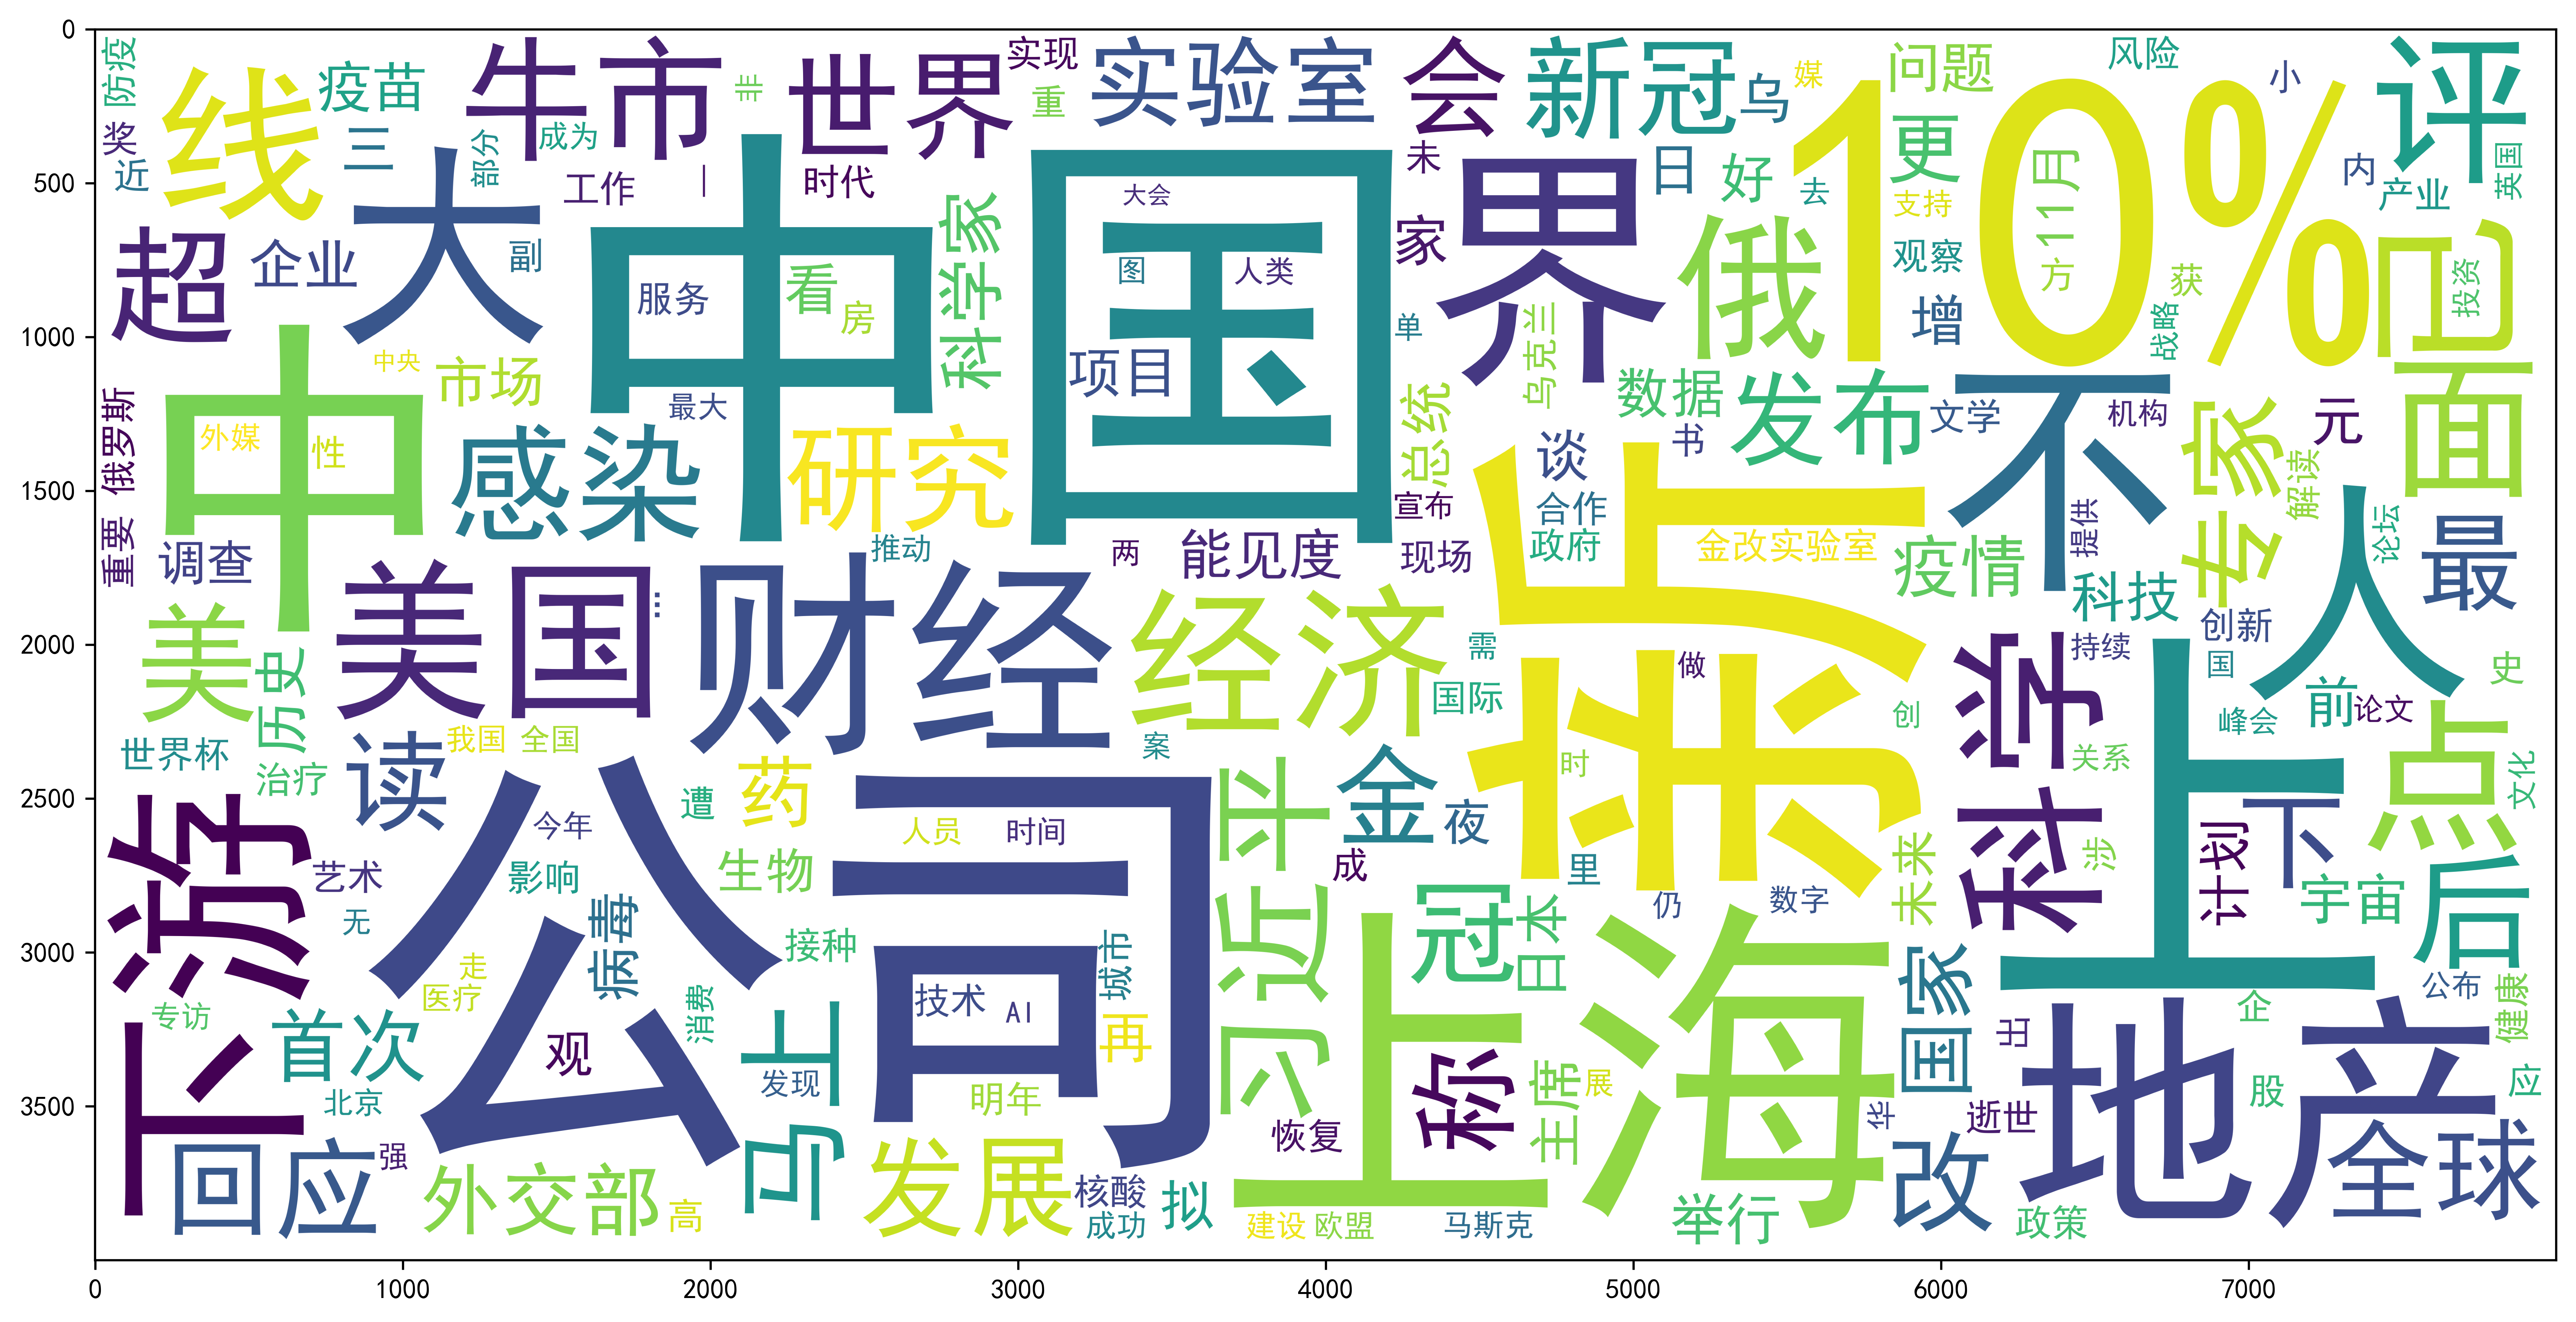

In [6]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
plt.figure(figsize = (16, 8), dpi = 600)
model_wordcloud=WordCloud(font_path=r"c:\windows\fonts\simhei.ttf",background_color="white",max_font_size=80, scale=20)
word_frequence = Counter([token for line in cut_words for token in line])
wordcloud=model_wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)
plt.show()

In [7]:
# 数据集划分
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['title'].values, data['label'].values, test_size=0.2,random_state=14492,shuffle=True,stratify=data['label'])
print('训练集长度：', len(x_train))
print('测试集长度：', len(x_test))

训练集长度： 4000
测试集长度： 1000


In [8]:
x_train

array(['北京 第四 批次 6宗 住宅 收金 135亿元 热度 达到 较高 水平 地产 界',
       '台积电 3纳米 制程 技术 美国 工厂 正式 启动 拜登 出席 迁 机 仪式',
       '款 创新 药 全球 同步 获 批 惠及 中国 泛发性 脓疱 型 银 屑 病 患者', ...,
       '陕西 男子 购 虚假 医疗费 发票 申报 合作 医疗 报销 判刑 六个月', '11月 网文 书单 古风 西风',
       '11月 银行 结 售 汇 逆差 环比 收窄 47% 境内 外汇 供求 更 趋 平衡 金改实验室'], dtype=object)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

TFIDF = TfidfVectorizer(analyzer='word')
x = TFIDF.fit_transform(x_train).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

非常稀疏的矩阵

In [12]:
COUNT = CountVectorizer()
x2 = COUNT.fit_transform(x_train).toarray()
x2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
x2.sum(axis=1)

array([12, 11,  8, ..., 11,  5, 11], dtype=int64)

In [13]:
from sklearn.decomposition import PCA
# 数据降维
#实例化
pca=PCA(n_components=0.90)      #n_components可以为整数，也可以为小数，一般使用小数，表示保留的信息占总信息的百分比，一般为0.90-0.95

x_ = pca.fit_transform(x)
x_

array([[-1.72917418e-02,  7.82822572e-03, -2.66994326e-02, ...,
         6.05266090e-03, -8.15348830e-03, -2.82908687e-03],
       [-1.15557822e-02, -2.50532416e-02,  2.15079706e-02, ...,
        -1.95837675e-02,  1.95128527e-02, -9.83997311e-05],
       [ 4.42141337e-02, -3.44581406e-02,  1.09957392e-01, ...,
        -1.49221715e-02, -7.91257668e-03, -1.44104972e-03],
       ...,
       [-4.50274626e-03, -1.92240845e-02,  2.31930930e-03, ...,
         5.34979246e-03,  3.75745629e-03, -3.48539455e-03],
       [ 2.43619619e-03,  6.03034617e-03, -2.38068439e-02, ...,
        -1.31763900e-02, -3.31878804e-03,  2.03174989e-04],
       [ 1.01159237e-03,  1.57069523e-02, -2.61012366e-02, ...,
        -1.51134211e-04, -1.29390753e-02, -5.25553110e-03]])

In [14]:
pca.transform(x2)

array([[-0.0640535 ,  0.08477274, -0.08303543, ...,  0.01502816,
        -0.02581397, -0.01286254],
       [-0.03402653, -0.05633753,  0.10621808, ..., -0.05800628,
         0.05625642,  0.00292316],
       [ 0.25305573, -0.11875375,  0.59214033, ..., -0.03241736,
        -0.01426669,  0.00311895],
       ...,
       [ 0.00343297, -0.03780305,  0.06047264, ...,  0.01677243,
         0.01005756, -0.00679297],
       [ 0.02106011,  0.04837966, -0.04378986, ..., -0.029191  ,
        -0.00855961,  0.00314718],
       [ 0.02477305,  0.10067972, -0.06809579, ...,  0.00086236,
        -0.0348468 , -0.01365711]])

In [18]:
# 封装成函数

def load_data2(test_size=0.2,path = "../Get_Data/train2.csv",is_gotchinese=False):
    """加载数据

    Args:
        test_size (float, optional): 测试集比例. Defaults to 0.2.
        path (str, optional): 文件路径. Defaults to "../Get_Data/train.csv".

    Returns:
        _type_: _description_
    """
    data = pd.read_csv(path)
    if is_gotchinese:
        data['title'] = data['title'].map(utils.got_chinese)        # 除去标点符号
    cut_words = utils.cut_word(data['title'].to_list(),method='hanlp')  # 进行分词
    stopwords =  pd.read_csv("../Get_data/hit_stopwords.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8').stopword.values.tolist() #list
    cut_words = utils.Dropwords(stopwords,cut_words)[0] 
    data['title'] = cut_words
    data.title = data.title.apply(lambda x:" ".join(x))     # 出去中括号
    encoder = LabelEncoder()
    data['label'] = encoder.fit_transform(data['label'])    # 标签映射
    x_train, x_test, y_train, y_test = train_test_split(data['title'].values, data['label'].values, test_size=0.2,random_state=14492,shuffle=True,stratify=data['label'])
    return x_train,y_train,x_test,y_test

In [15]:
def pre_data(x_train_,x_test_,n = 0.95,method='count',is_pca=True):
    """数据处理

    Args:
        x_train_ (_type_): _description_
        x_test_ (_type_): _description_
        n (float, optional): 保留信息的数量. Defaults to 0.95.
        method (str, optional): 文本表示方法. Defaults to 'count'.
        is_pca (bool, optional): 是否降维. Defaults to True.

    Returns:
        _type_: _description_
    """
    if method == "count":
        COUNT = CountVectorizer(analyzer='word')
        x_train_ = COUNT.fit_transform(x_train_).toarray()        # 转换训练集
        x_test_ = COUNT.transform(x_test_).toarray()             # 假设测试集与训练集同分布，进行Transformer转换
        pca = PCA(n_components=n)                # 保留95%的信息
        if is_pca:
            x_train_ = pca.fit_transform(x_train_)
            x_test_ = pca.transform(x_test_)
            return x_train_,x_test_   # 假设同分布，先进行fit
        return x_train_,x_test_   
    else:
        TFIDF = TfidfVectorizer(analyzer='word')
        x_train_ = TFIDF.fit_transform(x_train_).toarray()        # 转换训练集
        x_test_ = TFIDF.transform(x_test_).toarray()              # 假设测试集与训练集同分布，进行Transformer转换
        pca = PCA(n_components=n)                # 保留95%的信息
        if is_pca:
            x_train_ = pca.fit_transform(x_train_)
            x_test_ = pca.transform(x_test_)
            return x_train_,x_test_   # 假设同分布，先进行fit
        return x_train_,x_test_   

In [19]:
x_train,y_train,x_test,y_test = load_data2()

In [20]:
x_train

array(['北京 第四 批次 6宗 住宅 收金 135亿元 热度 达到 较高 水平 地产 界',
       '台积电 3纳米 制程 技术 美国 工厂 正式 启动 拜登 出席 迁 机 仪式',
       '款 创新 药 全球 同步 获 批 惠及 中国 泛发性 脓疱 型 银 屑 病 患者', ...,
       '陕西 男子 购 虚假 医疗费 发票 申报 合作 医疗 报销 判刑 六个月', '11月 网文 书单 古风 西风',
       '11月 银行 结 售 汇 逆差 环比 收窄 47% 境内 外汇 供求 更 趋 平衡 金改实验室'], dtype=object)

In [19]:
x_train,x_test = pre_data(x_train,x_test)